In [462]:
import seaborn as sn
import quandl
API_KEY = "yCev-u-joPYss-FULGkt"
quandl.ApiConfig.api_key = (API_KEY)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [489]:
from sklearn.metrics import  mean_squared_error
import math
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split

In [465]:
def forecast_accuracy(forecast, actual):
    mse = mean_squared_error(actual, forecast)
    return math.sqrt(mse)

In [466]:
def preprocess(df):
    df = pd.DataFrame({'Date': df.index.values,
                        'value': df['Nominal Price']
                            })
    df = df.reset_index(drop=True)
    return df
    # print(df.info())

In [467]:
def ADF(df):
    result = adfuller(df.value.dropna())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

In [468]:
def autocorrelation(df):
    plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


    # Original Series
    fig, axes = plt.subplots(3, 2, sharex=True)
    axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
    axes[1, 1].set_xlim([0, 30])
    plot_acf(df.value, ax=axes[0, 1])

    # 1st Differencing
    axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
    axes[1, 1].set_xlim([0, 30])
    plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

    # 2nd Differencing
    axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
    axes[2, 1].set_xlim([0, 30])
    plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])

    plt.show()

In [469]:
def partialcorrelation(df):
    plt.rcParams.update({'figure.figsize':(6,1), 'figure.dpi':120})

    fig, axes = plt.subplots(1, 2, sharex=True)
    axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
    axes[1].set(ylim=(0,4))
    axes[1].set_xlim([0, 30])
    plot_pacf(df.value.diff().dropna(), ax=axes[1])

    plt.show()

In [470]:
def get_ARIMA(train, test, d, p, q):
    model = ARIMA(train.value, order=(p,d,q))
    fitted = model.fit()
    forecast = fitted.predict(len(train), end=len(train)+ len(test) - 1)

    plt.figure(figsize=(12,5), dpi=100)
    plt.plot(train.value, label='training')
    plt.plot(test.value, label='actual')
    plt.plot(forecast, label='forecast')
    plt.title('Forecast vs Actuals')
    plt.legend(loc='lower right', fontsize=8)
    plt.show()

    return model, forecast

In [471]:
def get_SARIMA(train, test, d, p, q, s):
    model = SARIMAX(train.value , order=(p, d, q), seasonal_order=(p, d, q, s))
    fitted = model.fit()
    forecast = fitted.predict(len(train), end=len(train)+ len(test) - 1)

    plt.figure(figsize=(12,5), dpi=100)
    plt.plot(train.value, label='training')
    plt.plot(test.value, label='actual')
    plt.plot(forecast, label='forecast')
    plt.title('Forecast vs Actuals')
    plt.legend(loc='lower right', fontsize=8)
    plt.show()

    return model, forecast

In [472]:
def forecast_accuracy(forecast, actual):
    mse = mean_squared_error(actual, forecast)
    return math.sqrt(mse)

Let's retrieve the data

In [473]:
jpnq_df = quandl.get('HKEX/10276')
premia_df = quandl.get('HKEX/09151')
heartCare_df = quandl.get('HKEX/06609')
acotec_df = quandl.get('HKEX/06669')

jpnq_df = preprocess(jpnq_df)
premia_df = preprocess(premia_df)
heartCare_df = preprocess(heartCare_df)
acotec_df = preprocess(acotec_df)

ADF test for Null Hypothesis

In [474]:
print("Stock: Jpnq100@ep2203b")
ADF(jpnq_df)
print("\nStock: Premia Star50-u")
ADF(premia_df)
print("\nStock: HeartCare-b")
ADF(heartCare_df)
print("\nStock: Acotec-b")
ADF(acotec_df)

Stock: Jpnq100@ep2203b
ADF Statistic: -1.693576
p-value: 0.434425

Stock: Premia Star50-u
ADF Statistic: -2.044943
p-value: 0.267221

Stock: HeartCare-b
ADF Statistic: -2.643014
p-value: 0.084429

Stock: Acotec-b
ADF Statistic: -1.879595
p-value: 0.341720


Since all of them have p-value > 0.05, null hypothesis is False

# Jpnq100@ep2203b

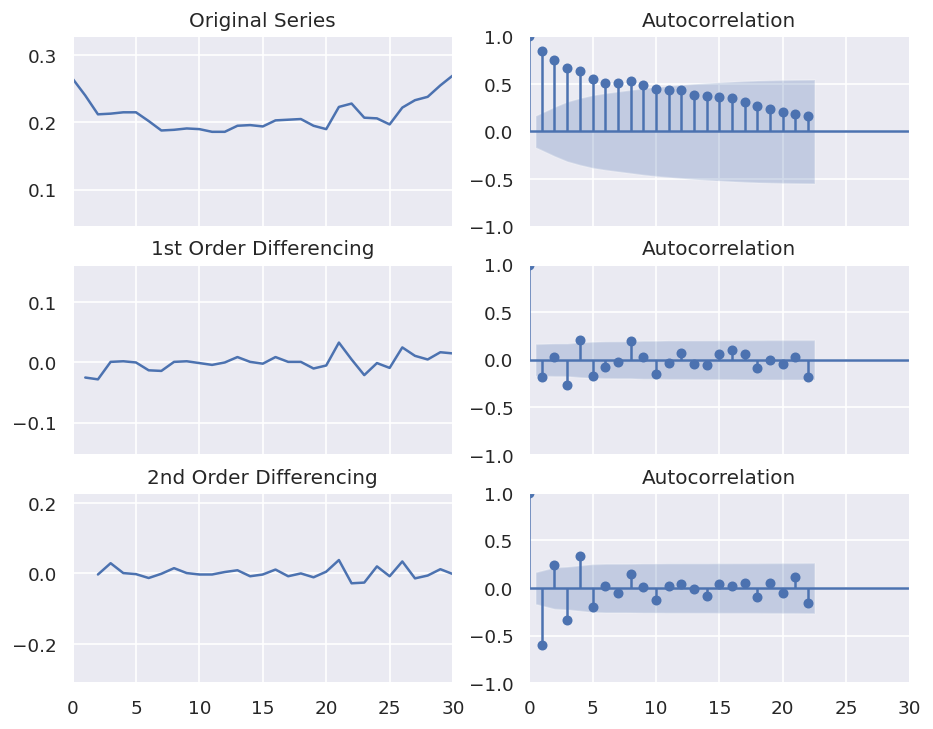

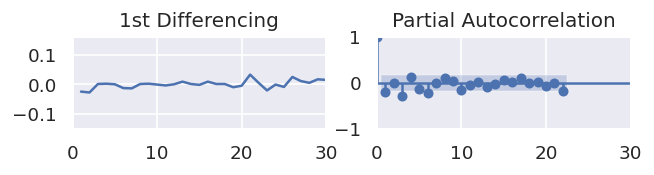

In [475]:
autocorrelation(jpnq_df)
partialcorrelation(jpnq_df)

d = 1, p = 1, q = 1, s = 12

In [503]:
len(jpnq_df)*0.8

111.2

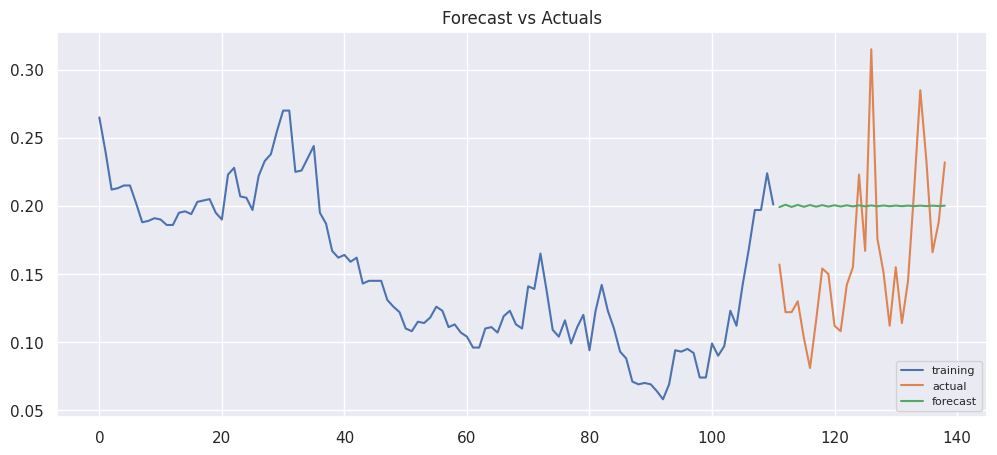

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.35590D+00    |proj g|=  1.25313D+01

At iterate    5    f= -2.37519D+00    |proj g|=  1.11455D-01

At iterate   10    f= -2.37811D+00    |proj g|=  5.02537D+00

At iterate   15    f= -2.39133D+00    |proj g|=  5.22055D-01

At iterate   20    f= -2.39502D+00    |proj g|=  3.55188D+00

At iterate   25    f= -2.39928D+00    |proj g|=  1.15642D+00

At iterate   30    f= -2.40722D+00    |proj g|=  3.82345D-01

At iterate   35    f= -2.40798D+00    |proj g|=  1.13331D-02

At iterate   40    f= -2.40800D+00    |proj g|=  1.52419D-02

At iterate   45    f= -2.40803D+00    |proj g|=  1.83597D-01

At iterate   50    f= -2.40803D+00    |proj g|=  8.85246D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

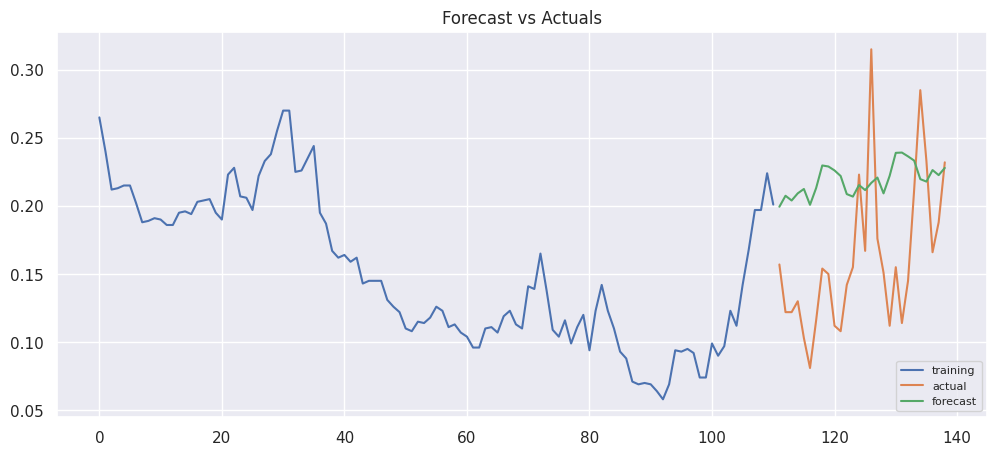

In [504]:
# ARIMA MODEL
train = jpnq_df[:111]
test = jpnq_df[111:]
# print(len(train), len(test))
model_ARIMA, forecast_ARIMA = get_ARIMA(train, test, 1, 1, 1)

# SARIMA MODEL
model_SARIMA, forecast_SARIMA = get_SARIMA(train, test, 1, 1, 1, 12)

In [477]:
# Root Mean Squared Error(RMSE)
print("RMSE ARIMA -> ", forecast_accuracy(forecast_ARIMA,test.value))
print("RMSE SARIMA -> ", forecast_accuracy(forecast_SARIMA,test.value))

RMSE ARIMA ->  0.08148921109030494
RMSE SARIMA ->  0.08646127427447538


# Premia Star50-u

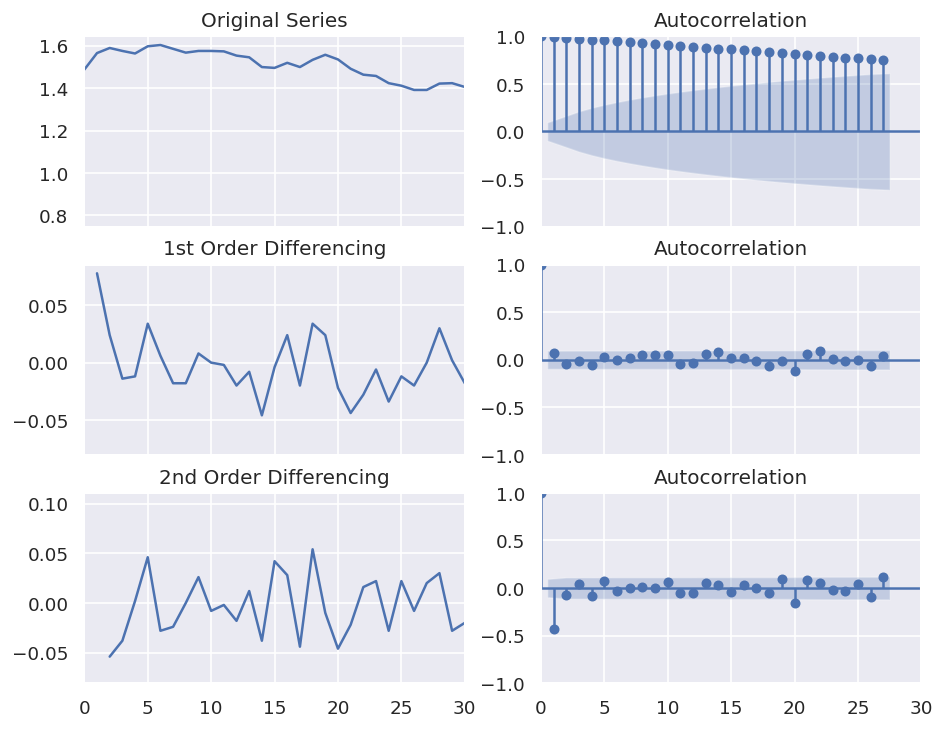

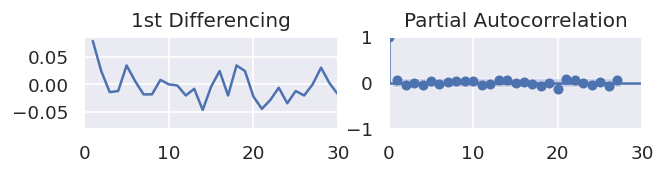

In [478]:
autocorrelation(premia_df)
partialcorrelation(premia_df)

d = 1, p = 1, q = 1, s = 12

In [501]:
len(premia_df)*0.8

337.6

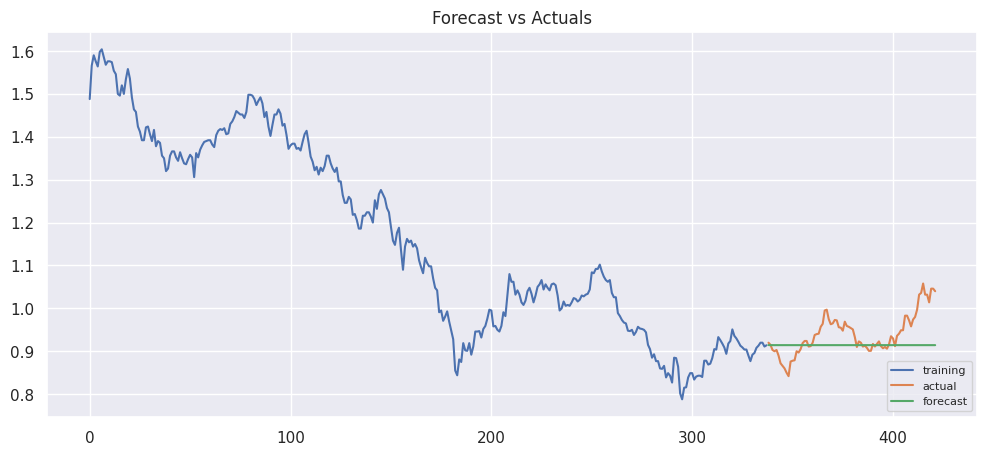

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.23537D+00    |proj g|=  1.23554D+01


 This problem is unconstrained.



At iterate    5    f= -2.27699D+00    |proj g|=  1.26587D-01

At iterate   10    f= -2.28693D+00    |proj g|=  5.84482D+00

At iterate   15    f= -2.29397D+00    |proj g|=  1.71807D-01

At iterate   20    f= -2.29846D+00    |proj g|=  3.30287D+00

At iterate   25    f= -2.32162D+00    |proj g|=  1.03569D+00

At iterate   30    f= -2.32713D+00    |proj g|=  1.81789D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   35    f= -2.34829D+00    |proj g|=  1.53129D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     54      1     0     0   1.531D-01  -2.348D+00
  F =  -2.3482872398426311     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


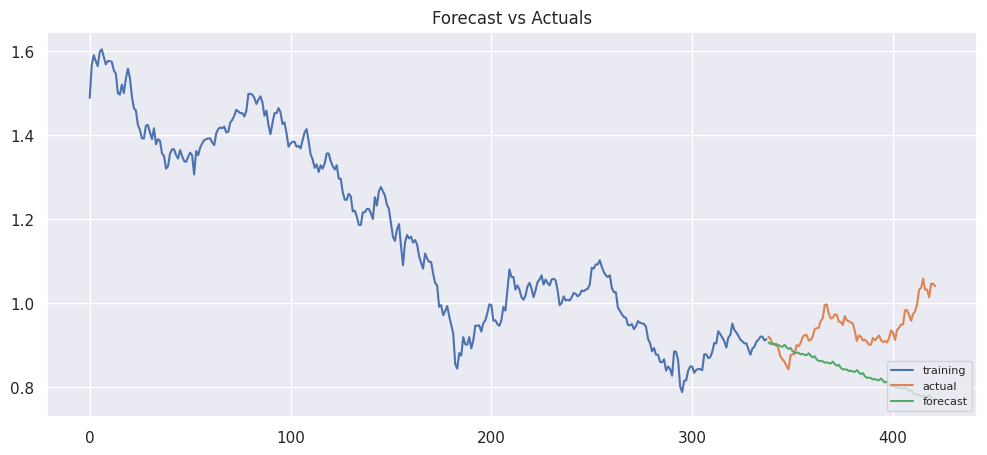

In [502]:
train = premia_df[:338]
test = premia_df[338:]
# print(len(train), len(test))
model, forecast_ARIMA = get_ARIMA(train, test, 1, 1, 1)
# SARIMA MODEL
model_SARIMA, forecast_SARIMA = get_SARIMA(train, test, 1, 1, 1, 12)

In [480]:
# Root Mean Squared Error(RMSE)
print("RMSE ARIMA -> ", forecast_accuracy(forecast_ARIMA,test.value))
print("RMSE SARIMA -> ", forecast_accuracy(forecast_SARIMA,test.value))

RMSE ARIMA ->  0.07170754225918959
RMSE SARIMA ->  0.08316689943986598


# HeartCare-b

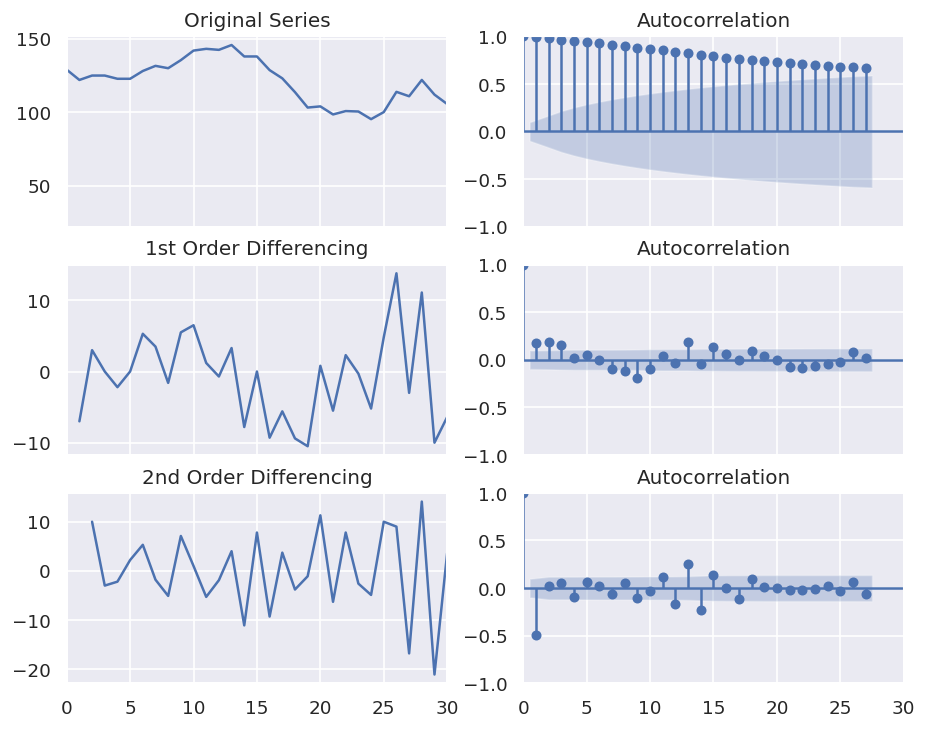

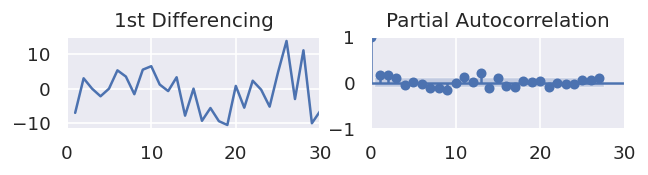

In [481]:
autocorrelation(heartCare_df)
partialcorrelation(heartCare_df)

d = 1, p = 1, a = 1, s = 12

In [496]:
len(heartCare_df)*0.8

324.0

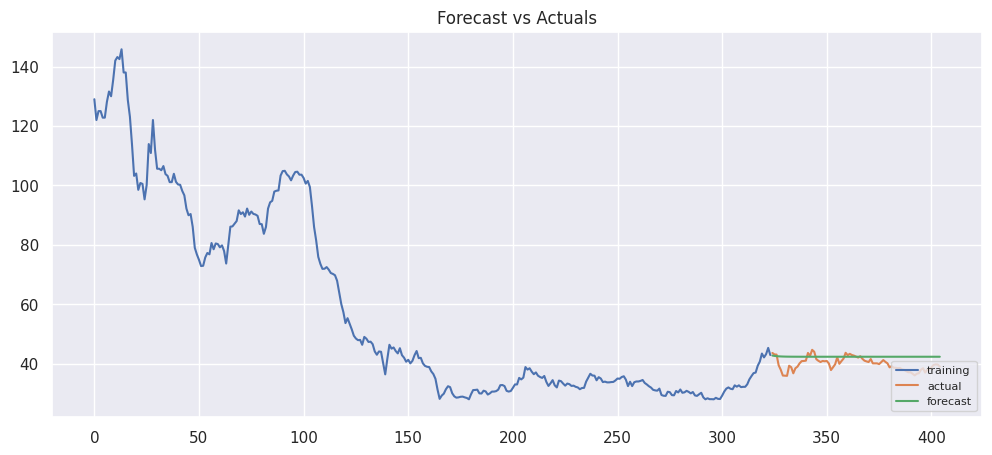

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.44607D+00    |proj g|=  1.79902D-01

At iterate    5    f=  2.30525D+00    |proj g|=  1.99981D-02

At iterate   10    f=  2.28830D+00    |proj g|=  4.40562D-03

At iterate   15    f=  2.28753D+00    |proj g|=  2.03780D-02

At iterate   20    f=  2.28705D+00    |proj g|=  9.35535D-04

At iterate   25    f=  2.28699D+00    |proj g|=  4.31435D-04

At iterate   30    f=  2.28698D+00    |proj g|=  1.75775D-04

At iterate   35    f=  2.28698D+00    |proj g|=  2.38837D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


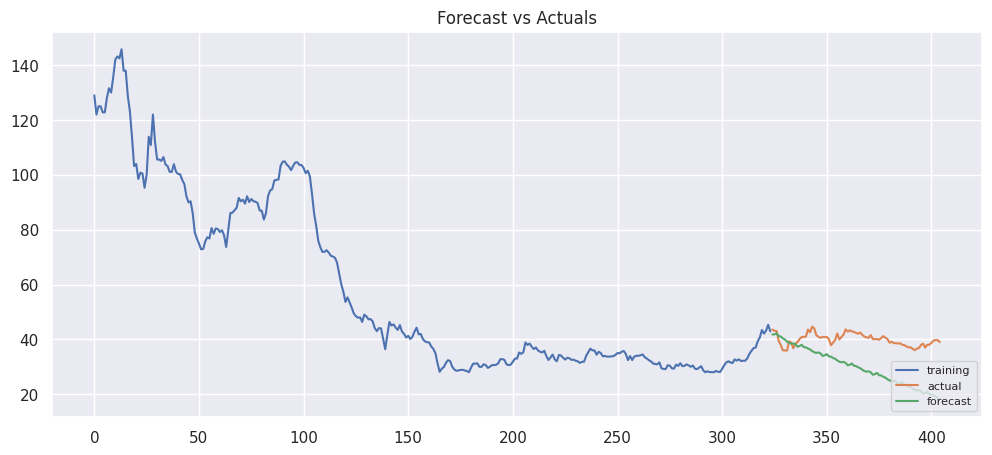

In [499]:
train = heartCare_df[:324]
test = heartCare_df[324:]
# print(len(train), len(test))
model, forecast_ARIMA = get_ARIMA(train, test, 1, 1, 1)
# SARIMA MODEL
model_SARIMA, forecast_SARIMA = get_SARIMA(train, test, 1, 1, 1, 12)

In [484]:
# Root Mean Squared Error(RMSE)
print("RMSE ARIMA -> ", forecast_accuracy(forecast_ARIMA,test.value))
print("RMSE SARIMA -> ", forecast_accuracy(forecast_SARIMA,test.value))

RMSE ARIMA ->  0.04950982371720974
RMSE SARIMA ->  0.07062808099082428


# Acotec-b

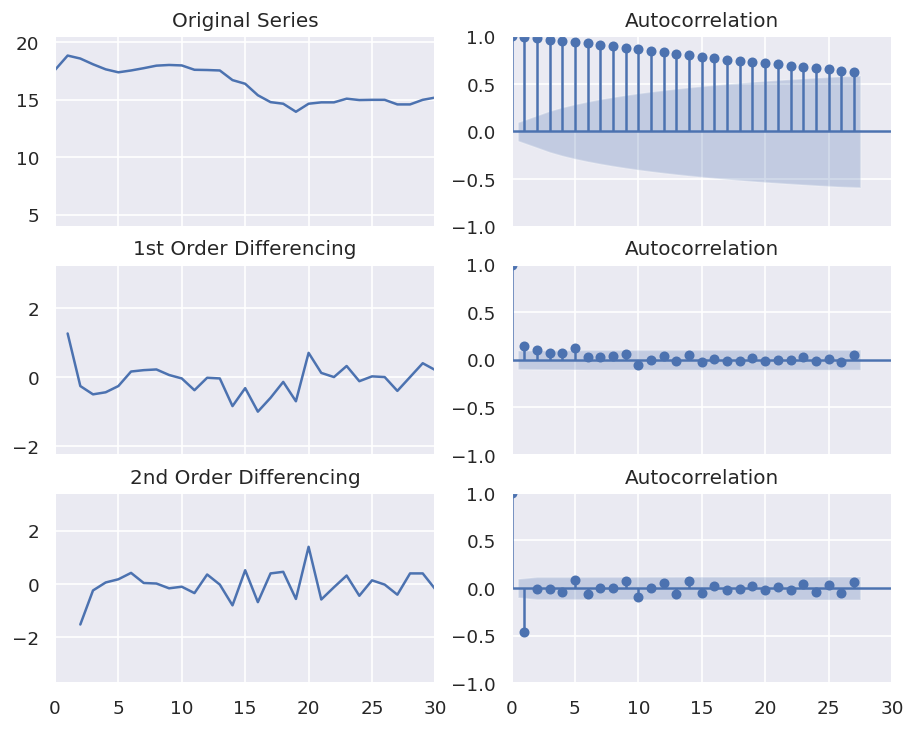

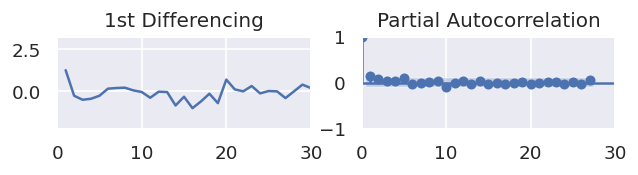

In [485]:
autocorrelation(acotec_df)
partialcorrelation(acotec_df)

d = 1, p = 1, q = 1, s = 12

In [505]:
len(acotec_df)*0.8

320.8

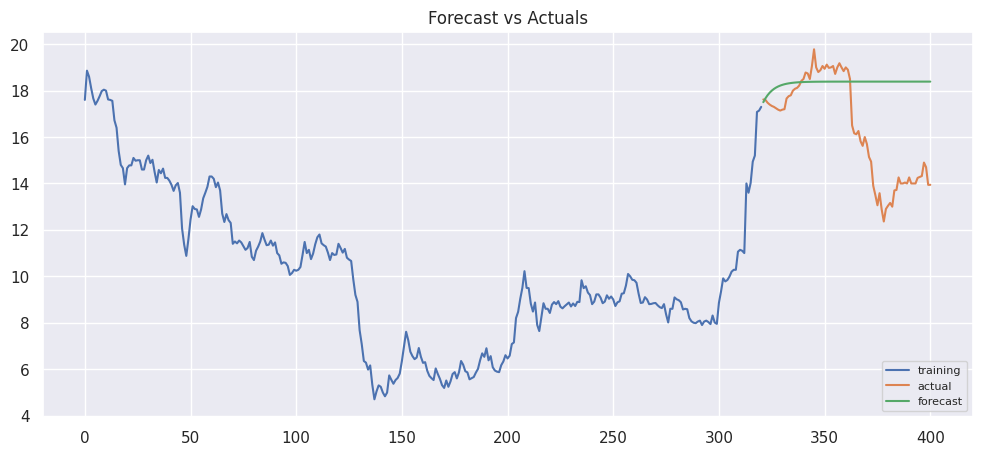

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.02718D-01    |proj g|=  5.98202D-01


 This problem is unconstrained.



At iterate    5    f=  5.57137D-01    |proj g|=  1.58810D-01

At iterate   10    f=  5.46048D-01    |proj g|=  7.95558D-03

At iterate   15    f=  5.45330D-01    |proj g|=  1.31713D-02

At iterate   20    f=  5.44977D-01    |proj g|=  1.66080D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     27      1     0     0   4.936D-06   5.450D-01
  F =  0.54497727090147896     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


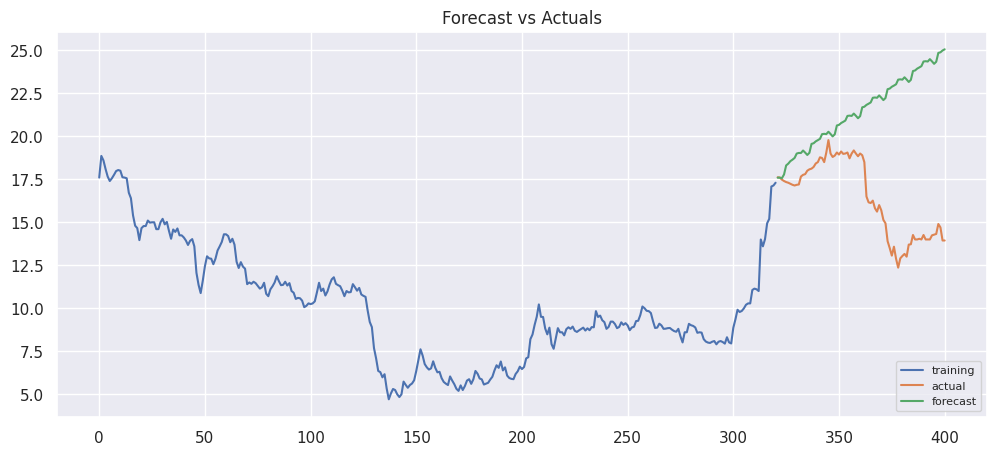

In [508]:
train = acotec_df[:321]
test = acotec_df[321:]
# print(len(train), len(test))
model, forecast_ARIMA = get_ARIMA(train, test, 1, 1, 1)
# SARIMA MODEL
model_SARIMA, forecast_SARIMA = get_SARIMA(train, test, 1, 1, 1, 12)

In [488]:
# Root Mean Squared Error(RMSE)
print("RMSE ARIMA -> ", forecast_accuracy(forecast_ARIMA,test.value))
print("RMSE SARIMA -> ", forecast_accuracy(forecast_SARIMA,test.value))

RMSE ARIMA ->  2.1403798148543913
RMSE SARIMA ->  2.211159613349261
